In [0]:
import numpy as np
import cv2
import os
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout,SpatialDropout2D
from keras.models  import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import random,os,glob
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
##################
#for Francesco 
train_dir = "gdrive/My Drive/IEOR SQUAD/242/Final Project/242 Final Models/data/train/"
test_dir = 'gdrive/My Drive/IEOR SQUAD/242/Final Project/242 Final Models/data/test/'
valid_dir = 'gdrive/My Drive/IEOR SQUAD/242/Final Project/242 Final Models/data/validation/'

In [0]:
###################
#for Fellipe
train_dir = "gdrive/My Drive/data/train/"
test_dir = 'gdrive/My Drive/data/test/'
valid_dir = 'gdrive/My Drive/data/valid/'

In [0]:
train_list = glob.glob(os.path.join(train_dir, '*/*.jpg'))
test_list = glob.glob(os.path.join(test_dir, '*/*.jpg'))
valid_list = glob.glob(os.path.join(valid_dir, '*/*.jpg'))

##importing images into an array
print(len(train_list))
print(len(test_list))
print(len(valid_list))


1252
643
632


In [0]:
'''Image Pre-Proccesing'''

train_datagen = ImageDataGenerator(horizontal_flip=True,
                         vertical_flip=True,
                         rescale=1./255,
                         zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 200),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(200, 200),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(200, 200),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)


Found 1252 images belonging to 6 classes.
Found 632 images belonging to 6 classes.
Found 643 images belonging to 6 classes.


In [0]:
model=Sequential()
#Convolution blocks

#Three Pooling layers provide an approach to down sampling feature maps by summarizing the presence of features in patches of the feature map.
# Three 2D convolution layer (e.g. spatial convolution over images).
model.add(Conv2D(32,(3,3), padding='same',input_shape=(200,200,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

#Classification layers
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(6,activation='softmax'))

#Three fully Connected (dense) Layers


In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 32)        18464     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 20000)            

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc']) # RMS PROP - No accuracy

In [0]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_list) // 32,
        epochs=80,
        validation_data=validation_generator)

Epoch 1/80
39/39 [==============================] - 22s 556ms/step - loss: 1.6864 - acc: 0.2747 - val_loss: 1.4737 - val_acc: 0.3972
Epoch 2/80
39/39 [==============================] - 21s 541ms/step - loss: 1.4861 - acc: 0.3735 - val_loss: 1.3552 - val_acc: 0.4462
Epoch 3/80
39/39 [==============================] - 21s 536ms/step - loss: 1.4163 - acc: 0.4209 - val_loss: 1.3189 - val_acc: 0.4509
Epoch 4/80
39/39 [==============================] - 21s 542ms/step - loss: 1.3903 - acc: 0.4520 - val_loss: 1.3272 - val_acc: 0.4509
Epoch 5/80
39/39 [==============================] - 20s 520ms/step - loss: 1.3126 - acc: 0.4958 - val_loss: 1.2467 - val_acc: 0.4937
Epoch 6/80
39/39 [==============================] - 21s 530ms/step - loss: 1.2686 - acc: 0.5104 - val_loss: 1.2201 - val_acc: 0.5127
Epoch 7/80
39/39 [==============================] - 20s 524ms/step - loss: 1.2576 - acc: 0.5176 - val_loss: 1.1306 - val_acc: 0.5823
Epoch 8/80
39/39 [==============================] - 20s 513ms/step - 

In [0]:
# for Fellipe
model.save_weights("gdrive/My Drive/data/models/cnn.h5")

In [0]:
############
#for Francesco 
model.load_weights("gdrive/My Drive/IEOR SQUAD/242/Final Project/242 Final Models/data/model.h5")


In [0]:
##########
#Fellipe
model.load_weights("gdrive/My Drive/data/model/cnn.h5")

In [0]:
print(len(validation_generator.classes),len(y_pred))
print(len(valid_list))
print(len(test_generator))
print(len(test_list) // 32+1)

In [0]:
print(model.evaluate_generator(validation_generator))
print(model.metrics_names)

[0.9708007965236902, 0.7594936716405651]
['loss', 'acc']


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import pandas as pd 
import seaborn as sns

############
#check validation set 
validation_generator.reset()
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
cf = confusion_matrix(validation_generator.classes, y_pred)

correct = 0
for r in range(len(cf)):
  for c in range(len(cf)):
    if(r==c):
      correct += cf[r,c]

accuracy = correct/sum(sum(cf))
print(accuracy)
validation_generator.reset()
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
cf = confusion_matrix(validation_generator.classes, y_pred)
correct = 0
for r in range(len(cf)):
  for c in range(len(cf)):
    if(r==c):
      correct += cf[r,c]

accuracy = correct/sum(sum(cf))
print(accuracy)


0.759493670886076
0.759493670886076


In [0]:
######### 
#testing 
Y_pred = model.predict_generator(test_generator, len(test_list) // 32 +1)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
cf = confusion_matrix(test_generator.classes, y_pred)

cm_df = pd.DataFrame(cf,
                     index = target_names, 
                     columns = target_names)



print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

   cardboard       0.82      0.82      0.82       106
       glass       0.66      0.62      0.64       124
       metal       0.64      0.63      0.64       106
       paper       0.80      0.89      0.84       150
     plastic       0.64      0.63      0.64       123
       trash       0.62      0.53      0.57        34

    accuracy                           0.72       643
   macro avg       0.70      0.69      0.69       643
weighted avg       0.71      0.72      0.71       643



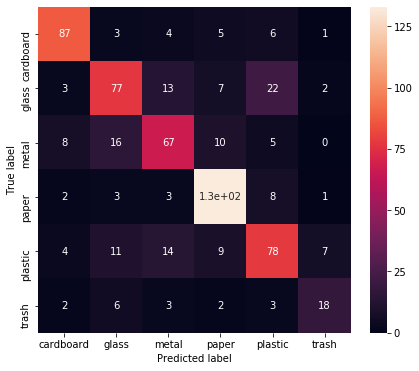

In [0]:
plt.figure(figsize=(7,6))
sns.heatmap(cm_df, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.ylim(len(cf), 0)
plt.show()

In [0]:
print(cf)
correct = 0

for r in range(len(cf)):
  for c in range(len(cf)):
    if(r==c):
      correct += cf[r,c]

accuracy = correct/sum(sum(cf))
accuracy


[[ 87   3   4   5   6   1]
 [  3  77  13   7  22   2]
 [  8  16  67  10   5   0]
 [  2   3   3 133   8   1]
 [  4  11  14   9  78   7]
 [  2   6   3   2   3  18]]


0.7153965785381027

In [0]:
print(model.evaluate_generator(test_generator))
print(model.metrics_names)

[1.0909945351154215, 0.7153965786308004]
['loss', 'acc']


In [0]:
import numpy as np
from scipy.stats import norm

def confidence_interval(preds, actual):
  pred_actual = (preds == actual)*1
  np.random.seed(100)
  bootstrap = np.random.choice(pred_actual, size=(len(pred_actual),100), replace=True)
  test_acc = np.mean(pred_actual)
  bootstrap_dist = bootstrap.mean(axis=0) - test_acc
  qu = norm.ppf(0.975)*bootstrap_dist.std() + bootstrap_dist.mean()
  ql = norm.ppf(0.025)*bootstrap_dist.std() + bootstrap_dist.mean()
  lower_bound = test_acc - qu
  upper_bound = test_acc - ql
  return (lower_bound, upper_bound)

In [0]:
confidence_interval(y_pred, test_generator.classes)

(0.6804217008793451, 0.7490650798360516)